# **Proyek Analisis Data : E-Commerce Public Dataset**



*   Nama : Ahmad Zakki Fadhilurrahman
*   Email : ahmaedjk3@gmail.com
*   id Dicoding : ahmadz18017

# **Menentukkan Pertanyaan Bisnis**


List Pertanyaan

*   Pertanyaan 1 : Bagaimana performa masing-masing kategori produk berdasarkan penilaian pembeli (review score)
*   Pertanyaan 2 : Bagaimanakah informasi rentang harga (rata-rata) harga produk berdasarkan jumlah order dan nilai review yang dimiliki
*   Pertanyaan 3 : Bagaimana Analisis RFM (recency, frequency, dan monetary) dari masing-masing customer.
*   Pertanyaan 4 : Bagaimanakah informasi banyaknya pembelian dan penghasilan yang didapatkan berdasarkan daerah customer (city) (10 tertinggi)
*   Pertanyaan 5 : Bagaimanakah informasi penghasilan yang didapatkan per bulannya







Catatan : Pengerjaan yang saya lakukan terkadang tidak memenuhi urutan analisis data secara linear melainkan merupakan proses berulang sehingga setiap data yang telah dilakukan proses, misal explanatory dapat perlu melakukan assessing dan lain lain

# **Menyiapkan semua library yang dibutuhkan**

In [1]:
!pip install pipreqs

  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=956ae428b75b680b856d1cd26073f49d13347decee0d37ee57dec81306645e43
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wragling**

**Gathering Data**

Sebelumnya saya menginisasi semua data yang saya punya terlebih dahulu (sudah saya ubah dalam bentuk link drive)

Untuk menjawab pertanyaan pertama diperlukan file product_dataset.csv, product_category_name_translation.csv, order_reviews_dataset.csv. Selain itu, digunakan pula dataset order_items_dataset.csv untuk menentukan banyaknya order berdasarkan product_id

sementara untuk menjawab pertanyaan kedua diperlukan file customers_dataset.csv, orders_dataset.csv, dan order_item_dataset.csv.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
product_dataset=pd.read_csv('gdrive/My Drive/Colab Notebooks/Tugas Proyek Analisis Data/products_dataset.csv')
product_dataset.info() #Melihat informasi umum dataset yang diimport
#Informasi untuk product_dataset digunakan yaitu product_id dan category_name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [5]:
product_dataset.head(2) #Melihat informasi 2 baris teratas dari dataset yang diimport

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [6]:
product_translate=pd.read_csv('gdrive/My Drive/Colab Notebooks/Tugas Proyek Analisis Data/product_category_name_translation.csv')
product_translate.info() #pada product_translate seluruh colomn digunakan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [7]:
product_translate.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [8]:
order_reviews=pd.read_csv('gdrive/My Drive/Colab Notebooks/Tugas Proyek Analisis Data/order_reviews_dataset.csv')
order_reviews.info()
#pada dataset order_reveiws colomnd digunakan yaitu order_id dan review_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [9]:
order_reviews.sample(3) #Melihat sampel acak dari dataset yang diimport

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
76894,0b0b595dd01d04047314e798015f194d,acce8dc7c037773682b18bef8769e12e,5,NaN,NaN,2018-02-01 00:00:00,2018-02-04 23:02:32
9316,ea49d109daf633c10f168bb425f6129f,af8a65413a5278f53502a4c24ec7e343,5,NaN,NaN,2017-05-12 00:00:00,2017-05-14 11:50:34
45007,ea61bb6aa43c6303a912f2245b0ee37c,9f93d6d806ea3735add613d07df54266,5,Excelente,Recomendo. Pois o produto que comprei chegou b...,2018-05-06 00:00:00,2018-05-08 14:55:23


In [10]:
order_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Tugas Proyek Analisis Data/orders_dataset.csv')
order_df.info() #pada dataset order_df column yang digunakan yaitu order_id, customer_id, dan order_approvet_at
#Order_approved_at masih dalam bentuk object (perlu diperhatikan seluruh tanggal masih dalam bentuk object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
order_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [12]:
customers_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Tugas Proyek Analisis Data/customers_dataset.csv')
customers_df.info() #pada dataset customers_df column yang digunakan yaitu customer_id dan customer_city

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [14]:
#Dataset ini sangat penting untuk menjawab semua pertanyaan
#Merupakan dataset dengan jumlah baris terbanyak karena ada nilai berbeda yaitu order_item_id dengan nilai kolom lain yang sama
item_info=pd.read_csv('gdrive/My Drive/Colab Notebooks/Tugas Proyek Analisis Data/order_items_dataset.csv')
item_info.info() #Pada dataset item_info column yang digunakan yaitu order_id, order_item_id, product_id, dan price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
item_info.head(2) #terdapat informasi yang sama diseluruh column

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [16]:
df=item_info[item_info.order_id.duplicated(keep=False)]
df.head(5) #terdapat informasi yang sama diseluruh column kecuali order_item_id

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10


**Assessing Data**

In [17]:
product_dataset.info() #menentukan tipe data apakah sudah sesuai (untuk category name sudah) serta total data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [18]:
print(f' jumlah duplikasi product_dataset = {product_dataset.duplicated().sum()}') #Menentukan duplikasi jika terdapat duplikasi
print(product_dataset.isna().sum()) #Menentukan total missing value dimana terdapat 610 missing value
null_product_dataset=product_dataset[product_dataset.product_category_name.isna()]
null_product_dataset.sample(4)
#Memberikan 4 sampel sebagai contoh terutama pada product category_name yang merupakan data diperlukan untuk pertanyaan ke 1

 jumlah duplikasi product_dataset = 0
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
7846,e948cf75e6b64307f7f76a49eaa9fc2f,NaN,NaN,NaN,NaN,2300.0,36.0,21.0,36.0
25314,a9c404971d1a5b1cbc2e4070e02731fd,NaN,NaN,NaN,NaN,700.0,35.0,14.0,11.0
15092,7dc0fd89c290eb0b3e5253d19be59f6f,NaN,NaN,NaN,NaN,800.0,20.0,25.0,20.0
14343,930363fe8355b51e7bb4154214246561,NaN,NaN,NaN,NaN,3600.0,50.0,35.0,15.0


In [19]:
product_translate.info() #Menentukan informasi tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [20]:
print(f' jumlah duplikasi product_translate = {product_translate.duplicated().sum()}') #Menentukan duplikasi jika terdapat duplikasi
print(product_translate.isna().sum()) #Menentukan total missing value dimana tidak terdapat

 jumlah duplikasi product_translate = 0
product_category_name            0
product_category_name_english    0
dtype: int64


In [21]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [22]:
print(f' jumlah duplikasi order_reviews = {order_reviews.duplicated().sum()}') #Menentukan duplikasi jika terdapat duplikasi
print(order_reviews.isna().sum()) #Menentukan total missing value dimana untuk_score tidak didapatkan missing value

 jumlah duplikasi order_reviews = 0
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [23]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [24]:
print(f' jumlah duplikasi customers_df = {customers_df.duplicated().sum()}') #Menentukan duplikasi jika terdapat duplikasi
print(customers_df.isna().sum()) #Menentukan total missing value dimana tidak terdapat missing value


 jumlah duplikasi customers_df = 0
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [25]:
print(f' jumlah duplikasi order_df = {order_df.duplicated().sum()}') #Menentukan duplikasi jika terdapat duplikasi
print(order_df.isna().sum())
#Menentukan total missing value dimana tidak terdapat missing value untuk customer_id dan order_id, namun terdapat missing_value di order_approved_at
#Namun demikian total data order_approved_at tidak terlalu signifikan sehingga dapat didrop

 jumlah duplikasi order_df = 0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [26]:
null_order_df=order_df[order_df.order_approved_at.isna()]
null_order_df.sample(4)
#Memberikan 4 sampel sebagai contoh terutama pada product approved_at yang merupakan data diperlukan untuk pertanyaan ke 3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
62197,65fdcb432cb9cfa970e3a3817b39040d,bb8cc73ebebcd23c9f69c52637229c53,canceled,2018-08-29 08:44:38,NaN,NaN,NaN,2018-09-13 00:00:00
5642,c5a468ae781ffb0ec6d36ae89fe512b0,ed7ef682569428c1afaf73b39a2f602b,canceled,2017-01-13 11:06:56,NaN,NaN,NaN,2017-02-13 00:00:00
23526,15ec3d48383c58c0dc96cd66f8884630,fc768a2275c44d9383cc6926adac469d,canceled,2018-08-23 15:17:19,NaN,NaN,NaN,2018-09-20 00:00:00
29915,2663ce3526465b7ee9809428adabdc45,032a544bbe984490f6ff7450e3c8b0bc,canceled,2018-08-30 13:07:46,NaN,NaN,NaN,2018-09-12 00:00:00


In [27]:
print(f' jumlah duplikasi item_info = {item_info.duplicated().sum()}') #Menentukan duplikasi jika terdapat duplikasi
print(item_info.isna().sum()) #Menentukan total missing value dimana tidak terdapat missing value

 jumlah duplikasi item_info = 0
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


**Cleaning Data**

In [28]:
product_dataset.groupby(by='product_category_name').product_id.nunique().sort_values(ascending=False)
#Menunjukkan produk dengan kategori nama terbanyak

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

In [29]:
new_product_dataset=product_dataset.dropna()
#Mengganti Missing vallue dengan membuat dataframe baru

In [30]:
print(new_product_dataset.isna().sum())
#Pengecekan Ulang

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [31]:
order_df.dropna(subset=['order_approved_at'], inplace=True)
#melakukan drop pada colomn order_approved_at yang memiliki missing value

In [32]:
print(order_df.isna().sum())
#Pengecekan Ulang

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1637
order_delivered_customer_date    2819
order_estimated_delivery_date       0
dtype: int64


# **Tahap Explorasi Data**

Bagaimana performa produk berdasarkan penilaian pembeli, seperti produk dengan rating tertinggi dan terendah?

**Proses merge pertama** dari new_product_dataset dan product_translate menggunakan left join menghasilkan **product_dataset_translate** (hasil mentranslate dataset new_product_dataset berdasarkan kesesuaian product_category_name)

In [33]:
product_dataset_translate=pd.merge(
    left=new_product_dataset,
    right=product_translate,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
#product_set_and_translate_df.head()
print(product_dataset_translate.isna().sum()) #Terdapat 13 Missing Value Setelah penggabungan
product_dataset_translate[product_dataset_translate['product_category_name_english'].isnull()]
#Terdapat nilai Null pada hasil penggabungan disebabkan oleh terdapat product_category_name yang tidak terdapat dalam translatenya
#Hal ini yaitu pc_gamer dan portateis_cozinha_e_preparadores_de_alimentos

product_id                        0
product_category_name             0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  0
product_length_cm                 0
product_height_cm                 0
product_width_cm                  0
product_category_name_english    13
dtype: int64


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1581,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
5703,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
7176,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
7326,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
8647,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN
10822,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
13995,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0,NaN
15874,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0,NaN
16608,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,NaN
17459,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,NaN


In [34]:
product_dataset_translate.groupby(by='product_category_name_english').product_id.nunique().sort_values(ascending=False)
#Mengecek jumlah product_category_name_english

product_category_name_english
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
home_comfort_2                  5
fashion_childrens_clothes       5
security_and_services           2
cds_dvds_musicals               1
Name: product_id, Length: 71, dtype: int64

In [35]:
product_dataset_translate.info() #hasil merge product_dataset_translate memiliki 32340 total baris data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32339
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32340 non-null  object 
 1   product_category_name          32340 non-null  object 
 2   product_name_lenght            32340 non-null  float64
 3   product_description_lenght     32340 non-null  float64
 4   product_photos_qty             32340 non-null  float64
 5   product_weight_g               32340 non-null  float64
 6   product_length_cm              32340 non-null  float64
 7   product_height_cm              32340 non-null  float64
 8   product_width_cm               32340 non-null  float64
 9   product_category_name_english  32327 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.7+ MB


In [36]:
product_dataset_translate.loc[product_dataset_translate['product_category_name']=='portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'ortable_kitchen_food_preparers'
product_dataset_translate.loc[product_dataset_translate['product_category_name']=='pc_gamer', 'product_category_name_english'] = 'pc_gamer'
#mengganti nilai missing value dengan kondisi kolom yang spesifik sesuai dengan translate yang diperlukan

In [37]:
product_dataset_translate.isna().sum() #Pengecekan kembali

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [38]:
(product_dataset_translate['product_category_name_english']=='ortable_kitchen_food_preparers').sum()
#memastikan jumlah column yang terganti bersesuaian dengan missing valuenya yaitu 10 column ortable_kitchen_food_preparers

10

In [39]:
(product_dataset_translate['product_category_name_english']=='pc_gamer').sum()
#memastikan jumlah column yang terganti bersesuaian dengan missing valuenya yaitu 3 column untuk pc_gamer

3

**Proses merge kedua** dari product_dataset_translate dan item_info menggunakan inner join menghasilkan **product_order_translate** (hasil menambahkan kolom product_category_name_english ke dataset item_info berdasarkan data product_id yang bersesuaian)

In [40]:
#Pengecekan jumlah baris data sebelum merge
product_dataset_translate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32339
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32340 non-null  object 
 1   product_category_name          32340 non-null  object 
 2   product_name_lenght            32340 non-null  float64
 3   product_description_lenght     32340 non-null  float64
 4   product_photos_qty             32340 non-null  float64
 5   product_weight_g               32340 non-null  float64
 6   product_length_cm              32340 non-null  float64
 7   product_height_cm              32340 non-null  float64
 8   product_width_cm               32340 non-null  float64
 9   product_category_name_english  32340 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.7+ MB


In [41]:
print(f'jumlah duplikasi pada product_id sebanyak {item_info.product_id.duplicated().sum()} \n')
item_info.info()
#item_info memiliki jumlah data yang lebih banyak disebabkan oleh duplikasi product_id namun dengan informasi column order_id yang berbeda
#hal ini juga terjadi pada column yang lain

jumlah duplikasi pada product_id sebanyak 79699 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [42]:
#Melakukan left joint untuk menggabungkan informasi tabel yang sama-sama berisi product_id
product_order_translate=pd.merge(
    left=item_info,
    right=product_dataset_translate,
    how='inner',
    left_on='product_id',
    right_on='product_id'
)
print(f'total missing untuk product_order_translate ({product_order_translate.isna().sum()}]') #Pengecekan missing value pada dataset hasil merge
product_order_translate[product_order_translate['product_category_name_english'].isnull()] #Pengecekan missing value pada dataset hasil
product_order_translate.head(3) #Memberikan contoh 3 teratas dari gabungan

total missing untuk product_order_translate (order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64]


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [43]:
product_order_translate.duplicated().sum() #Cek duplicate umum tidak ada

0

In [44]:
product_order_translate.info() #Hasil gabungan dataset menghasilan jumlah baris yang lebih banyak berdasarkan product_id yang sama

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111046 entries, 0 to 111045
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111046 non-null  object 
 1   order_item_id                  111046 non-null  int64  
 2   product_id                     111046 non-null  object 
 3   seller_id                      111046 non-null  object 
 4   shipping_limit_date            111046 non-null  object 
 5   price                          111046 non-null  float64
 6   freight_value                  111046 non-null  float64
 7   product_category_name          111046 non-null  object 
 8   product_name_lenght            111046 non-null  float64
 9   product_description_lenght     111046 non-null  float64
 10  product_photos_qty             111046 non-null  float64
 11  product_weight_g               111046 non-null  float64
 12  product_length_cm             

**Proses merge ketiga** dari product_order_translate dan order_reviews menggunakan inner join menghasilkan **product_review_translate** (hasil menambahkan kolom seluruh kolom gabungan dan dataset order_reviews  berdasarkan data order_id yang bersesuaian)

In [45]:
#Memeriksa adanya order_id lebih dari 1 dengan informasi yang berbeda
duplicated_product_order_translate=product_order_translate[product_order_translate.order_id.duplicated(keep=False)]
product_order_translate.order_id.duplicated().sum()
duplicated_product_order_translate.head(15)
#Terdapat order_id yang sama persis disetiap kolom hanya saja data yang sama ini hanya dibedakan pada kolom order_item_id

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
7,c9ef97d2854afe64a3b4488bc2836af6,2,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-14 04:25:34,58.90,18.12,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
11,45211f00dfa76aed1c20d6910d973222,2,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2017-11-06 15:46:14,199.00,20.08,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
45,09268d8b25dd31ae78b464efd453d069,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-06-14 04:57:05,59.99,3.03,beleza_saude,57.0,614.0,1.0,950.0,35.0,25.0,20.0,health_beauty
55,398545ae905dad286c70f01c7e7311e1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-04-12 03:28:44,59.99,19.39,beleza_saude,57.0,614.0,1.0,950.0,35.0,25.0,20.0,health_beauty
56,398545ae905dad286c70f01c7e7311e1,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-04-12 03:28:44,59.99,19.39,beleza_saude,57.0,614.0,1.0,950.0,35.0,25.0,20.0,health_beauty
60,41c45378fe62363faf80c45523a198f1,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2017-07-25 05:50:19,49.99,8.72,beleza_saude,57.0,614.0,1.0,950.0,35.0,25.0,20.0,health_beauty
61,41c45378fe62363faf80c45523a198f1,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2017-07-25 05:50:19,49.99,8.72,beleza_saude,57.0,614.0,1.0,950.0,35.0,25.0,20.0,health_beauty
68,7753606fb1d0067848f8a1a7ae5abefa,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-05-08 15:58:53,59.99,8.88,beleza_saude,57.0,614.0,1.0,950.0,35.0,25.0,20.0,health_beauty
69,7753606fb1d0067848f8a1a7ae5abefa,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-05-08 15:58:53,59.99,8.88,beleza_saude,57.0,614.0,1.0,950.0,35.0,25.0,20.0,health_beauty
76,9e52b130c2b57f5dbff34caec0e04467,1,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-01-15 20:08:22,59.99,16.18,beleza_saude,57.0,614.0,1.0,950.0,35.0,25.0,20.0,health_beauty


In [46]:
order_reviews.info() #Menampilkan info banyak baris untuk dataframe order_reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [47]:
product_review_translate=pd.merge(
    left=order_reviews, #Pada order review terdapat data yang tidak ada yaitu order_id tidak ditemukan di producnt trans1 order df
    right=product_order_translate,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)
product_review_translate.head()
product_review_translate.isna().sum()

review_id                            0
order_id                             0
review_score                         0
review_comment_title             97417
review_comment_message           63838
review_creation_date                 0
review_answer_timestamp              0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     0
product_length_cm                    0
product_height_cm                    0
product_width_cm                     0
product_category_name_english        0
dtype: int64

In [48]:
product_review_translate.info() #info dataset hasil merge ketiga
product_review_translate[product_review_translate['product_category_name_english'].isnull()] #tidak terdapat null pada product_category_name

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110773 entries, 0 to 110772
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      110773 non-null  object 
 1   order_id                       110773 non-null  object 
 2   review_score                   110773 non-null  int64  
 3   review_comment_title           13356 non-null   object 
 4   review_comment_message         46935 non-null   object 
 5   review_creation_date           110773 non-null  object 
 6   review_answer_timestamp        110773 non-null  object 
 7   order_item_id                  110773 non-null  int64  
 8   product_id                     110773 non-null  object 
 9   seller_id                      110773 non-null  object 
 10  shipping_limit_date            110773 non-null  object 
 11  price                          110773 non-null  float64
 12  freight_value                 

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english


In [49]:
#Pada order review terdapat data yang tidak ada yaitu order_id tidak ditemukan di product trans1 order df
#hal ini terjadi jika menggunakan left join
ord_df=pd.merge(
    left=order_reviews,
    right=product_review_translate,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
ord_df.isna().sum()

review_id_x                           0
order_id                              0
review_score_x                        0
review_comment_title_x           100700
review_comment_message_x          65730
review_creation_date_x                0
review_answer_timestamp_x             0
review_id_y                        2148
review_score_y                     2148
review_comment_title_y           100851
review_comment_message_y          66846
review_creation_date_y             2148
review_answer_timestamp_y          2148
order_item_id                      2148
product_id                         2148
seller_id                          2148
shipping_limit_date                2148
price                              2148
freight_value                      2148
product_category_name              2148
product_name_lenght                2148
product_description_lenght         2148
product_photos_qty                 2148
product_weight_g                   2148
product_length_cm                  2148


In [50]:
duplicated_product_review_translate=product_review_translate[product_review_translate.order_id.duplicated(keep=False)]
product_review_translate.order_id.duplicated().sum()
duplicated_product_review_translate.tail(15)
#Menampilkan data duplikat order_id dimana Data yang sama ini hanya dibedakan pada kolom order_item_id
#Untuk menjawab pertanyaan 1 maka kolom order_id dan order_id perlu digabungkan untuk menentukan jumlahan akhir order
#Selain itu, dipilih beberapa kolom yang memiliki informasi yang diperlukan menjadi pivot tabel baru

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
110685,9ed2a6bc2282fd2b0105055631afa57f,a7db1b7bfec5e83a8fd33625e99f0d15,1,NaN,Ate hoje dia 21/10/2017 o pedido não foi entre...,2017-10-21 00:00:00,2017-10-21 18:51:37,1,2fa5da96109ea94cc9fb50cc589ed65e,86ccac0b835037332a596a33b6949ee1,...,25.75,relogios_presentes,54.0,424.0,2.0,1850.0,23.0,2.0,26.0,watches_gifts
110686,9ed2a6bc2282fd2b0105055631afa57f,a7db1b7bfec5e83a8fd33625e99f0d15,1,NaN,Ate hoje dia 21/10/2017 o pedido não foi entre...,2017-10-21 00:00:00,2017-10-21 18:51:37,2,2fa5da96109ea94cc9fb50cc589ed65e,86ccac0b835037332a596a33b6949ee1,...,25.75,relogios_presentes,54.0,424.0,2.0,1850.0,23.0,2.0,26.0,watches_gifts
110687,9ed2a6bc2282fd2b0105055631afa57f,a7db1b7bfec5e83a8fd33625e99f0d15,1,NaN,Ate hoje dia 21/10/2017 o pedido não foi entre...,2017-10-21 00:00:00,2017-10-21 18:51:37,3,2fa5da96109ea94cc9fb50cc589ed65e,86ccac0b835037332a596a33b6949ee1,...,25.75,relogios_presentes,54.0,424.0,2.0,1850.0,23.0,2.0,26.0,watches_gifts
110688,29f15fe767c6de620f026cf5eb9da330,2f92b812fd7c7df5b629833c484cdf1d,5,NaN,Bom atendimento diante do que foi solicitado,2018-02-02 00:00:00,2018-02-05 13:40:42,1,2c0b8a973e616502de1d80482fb9c5be,5656537e588803a555b8eb41f07a944b,...,15.79,eletronicos,57.0,410.0,2.0,100.0,18.0,20.0,16.0,electronics
110689,29f15fe767c6de620f026cf5eb9da330,2f92b812fd7c7df5b629833c484cdf1d,5,NaN,Bom atendimento diante do que foi solicitado,2018-02-02 00:00:00,2018-02-05 13:40:42,2,2c0b8a973e616502de1d80482fb9c5be,5656537e588803a555b8eb41f07a944b,...,15.79,eletronicos,57.0,410.0,2.0,100.0,18.0,20.0,16.0,electronics
110694,d996452bcb578d50d73bd9b92039b603,f7541ffd5bcc27d83193554028f9127c,5,NaN,Veio por partes mas veio tudo certo!,2018-04-24 00:00:00,2018-04-26 12:34:14,1,cd66fdcc09793a54b109fee14eee72cd,c840d3fdbba0790404fdae73d253b253,...,14.98,moveis_decoracao,22.0,792.0,1.0,600.0,16.0,17.0,16.0,furniture_decor
110695,d996452bcb578d50d73bd9b92039b603,f7541ffd5bcc27d83193554028f9127c,5,NaN,Veio por partes mas veio tudo certo!,2018-04-24 00:00:00,2018-04-26 12:34:14,2,cd66fdcc09793a54b109fee14eee72cd,c840d3fdbba0790404fdae73d253b253,...,14.98,moveis_decoracao,22.0,792.0,1.0,600.0,16.0,17.0,16.0,furniture_decor
110726,35a13e6b01a98a70016bf32f5c004276,9b89cca19e5d0e3f239ba4f8cb120d99,5,NaN,NaN,2018-04-07 00:00:00,2018-04-09 13:44:30,1,94e87c8d2cac9ca6fa8c91b99712caaf,dd55f1bb788714a40e7954c3be6df745,...,16.81,telefonia_fixa,47.0,178.0,2.0,675.0,20.0,23.0,19.0,fixed_telephony
110727,35a13e6b01a98a70016bf32f5c004276,9b89cca19e5d0e3f239ba4f8cb120d99,5,NaN,NaN,2018-04-07 00:00:00,2018-04-09 13:44:30,2,94e87c8d2cac9ca6fa8c91b99712caaf,dd55f1bb788714a40e7954c3be6df745,...,16.81,telefonia_fixa,47.0,178.0,2.0,675.0,20.0,23.0,19.0,fixed_telephony
110743,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05 00:00:00,2018-06-06 10:52:19,1,a62e25e09e05e6faf31d90c6ec1aa3d1,634964b17796e64304cadf1ad3050fb7,...,11.62,relogios_presentes,58.0,3006.0,2.0,1000.0,53.0,8.0,18.0,watches_gifts


In [51]:
product_review_translate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110773 entries, 0 to 110772
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      110773 non-null  object 
 1   order_id                       110773 non-null  object 
 2   review_score                   110773 non-null  int64  
 3   review_comment_title           13356 non-null   object 
 4   review_comment_message         46935 non-null   object 
 5   review_creation_date           110773 non-null  object 
 6   review_answer_timestamp        110773 non-null  object 
 7   order_item_id                  110773 non-null  int64  
 8   product_id                     110773 non-null  object 
 9   seller_id                      110773 non-null  object 
 10  shipping_limit_date            110773 non-null  object 
 11  price                          110773 non-null  float64
 12  freight_value                 

**Proses Pembuatan Pivot tabel** darihasil akhir merge ke-3 menghasilkan **final_rating_category** (hasil copy dari product_review_translate kolom tertentu yaitu order_id, review_id, order_item_id, review_score, product_id, price, product_category_name_english)

***Ini dilakukan untuk menjawab pertanyaan 1 dan 2***

In [52]:
#Membuat dan mencari duplikat dengan membuat pivot tabel baru
final_rating_category= product_review_translate.iloc[:, [1, 7, 0, 2, 8, 11, 21]].copy()
duplikat_penentu= final_rating_category[final_rating_category.order_id.duplicated(keep=False)]
duplikat_penentu.head(10)
#Yang membedakan duplikat order_id yaitu hanya pada order_item_id, product_id, dan price (terutama order_item_id)
#sehingga data perhitungan jumlah dapat ditentukan dengan gabungan order_id dan order_item_id

,order_id,order_item_id,review_id,review_score,product_id,price,product_category_name_english
0,73fc7af87114b39712e6da79b0a377eb,1,7bc2406110b926393aa56f80a40eba40,4,fd25ab760bfbba13c198fa3b4f1a0cd3,185.0,sports_leisure
1,73fc7af87114b39712e6da79b0a377eb,2,7bc2406110b926393aa56f80a40eba40,4,fd25ab760bfbba13c198fa3b4f1a0cd3,185.0,sports_leisure
6,b18dcdf73be66366873cd26c5724d1dc,1,15197aa66ff4d0650b5434f1b46cda19,1,c45d02cc82cd779835094de9b29272cb,99.9,bed_bath_table
7,b18dcdf73be66366873cd26c5724d1dc,2,15197aa66ff4d0650b5434f1b46cda19,1,c45d02cc82cd779835094de9b29272cb,99.9,bed_bath_table
8,b18dcdf73be66366873cd26c5724d1dc,4,15197aa66ff4d0650b5434f1b46cda19,1,c45d02cc82cd779835094de9b29272cb,99.9,bed_bath_table
9,b18dcdf73be66366873cd26c5724d1dc,3,15197aa66ff4d0650b5434f1b46cda19,1,4e3550b4ebca5e32ccc3d32b3470e31f,119.0,bed_bath_table
15,3d374c9e46530bb5ed4a7648915306a6,1,96052551d87e5f62e6c9f6974ec392e9,5,7c03e2562178adecc404571f7c52db4e,121.9,garden_tools
16,3d374c9e46530bb5ed4a7648915306a6,2,96052551d87e5f62e6c9f6974ec392e9,5,7c03e2562178adecc404571f7c52db4e,121.9,garden_tools
17,3d374c9e46530bb5ed4a7648915306a6,3,96052551d87e5f62e6c9f6974ec392e9,5,7c03e2562178adecc404571f7c52db4e,121.9,garden_tools
18,3d374c9e46530bb5ed4a7648915306a6,4,96052551d87e5f62e6c9f6974ec392e9,5,7c03e2562178adecc404571f7c52db4e,121.9,garden_tools


In [53]:
final_rating_category.info() #data tipe penggabungan order_id dan order_item_id disamakan terlebih dahulu

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110773 entries, 0 to 110772
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110773 non-null  object 
 1   order_item_id                  110773 non-null  int64  
 2   review_id                      110773 non-null  object 
 3   review_score                   110773 non-null  int64  
 4   product_id                     110773 non-null  object 
 5   price                          110773 non-null  float64
 6   product_category_name_english  110773 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.8+ MB


In [54]:
#megubah jenis tipe data dan dijumlah
final_rating_category['Unique_Value']=final_rating_category['order_id'].astype(str)+final_rating_category['order_item_id'].astype(str)
final_rating_category.info() #mengecek info hasil tambahan colomn baru
#convert_dict = {"order_item_id": object}
#final_rating_category= final_rating_category.astype(convert_dict)


# delivery_time=orders_df['delivery_date']-orders_df['order_date']
#selisih waktu kolom delivery date dan order date adalah delivery time
# delivery_time=delivery_time.apply(lambda x: x.total_seconds())
#method .apply untuk melakukan operasi terhadap setiap elemeen dari dataframe ataupun series
#hasil perhitungan ini adalah second yang akan diubah menjadi hari
# orders_df['delivery_time']=round(delivery_time/86400) #convert hasil ke hari

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110773 entries, 0 to 110772
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110773 non-null  object 
 1   order_item_id                  110773 non-null  int64  
 2   review_id                      110773 non-null  object 
 3   review_score                   110773 non-null  int64  
 4   product_id                     110773 non-null  object 
 5   price                          110773 non-null  float64
 6   product_category_name_english  110773 non-null  object 
 7   Unique_Value                   110773 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 7.6+ MB


In [55]:
final_rating_category.Unique_Value.duplicated().sum() #Periksa duplikat column baru

655

In [56]:
final_rating_category.drop_duplicates(subset=['Unique_Value'], inplace=True) #Mendrop duplikat pada kolom baru

In [57]:
final_rating_category.head(20)

,order_id,order_item_id,review_id,review_score,product_id,price,product_category_name_english,Unique_Value
0,73fc7af87114b39712e6da79b0a377eb,1,7bc2406110b926393aa56f80a40eba40,4,fd25ab760bfbba13c198fa3b4f1a0cd3,185.00,sports_leisure,73fc7af87114b39712e6da79b0a377eb1
1,73fc7af87114b39712e6da79b0a377eb,2,7bc2406110b926393aa56f80a40eba40,4,fd25ab760bfbba13c198fa3b4f1a0cd3,185.00,sports_leisure,73fc7af87114b39712e6da79b0a377eb2
2,a548910a1c6147796b98fdf73dbeba33,1,80e641a11e56f04c1ad469d5645fdfde,5,be0dbdc3d67d55727a65d4cd696ca73c,79.79,computers_accessories,a548910a1c6147796b98fdf73dbeba331
3,f9e4b658b201a9f2ecdecbb34bed034b,1,228ce5500dc1d8e020d8d1322874b6f0,5,d1c427060a0f73f6b889a5c7c61f2ac4,149.00,computers_accessories,f9e4b658b201a9f2ecdecbb34bed034b1
4,658677c97b385a9be170737859d3511b,1,e64fb393e7b32834bb789ff8bb30750e,5,52c80cedd4e90108bf4fa6a206ef6b03,179.99,garden_tools,658677c97b385a9be170737859d3511b1
5,8e6bfb81e283fa7e4f11123a3fb894f1,1,f7c4243c7fe1938f181bec41a392bdeb,5,3880d25d502b15b1de6fddc42ad1d67a,1199.00,sports_leisure,8e6bfb81e283fa7e4f11123a3fb894f11
6,b18dcdf73be66366873cd26c5724d1dc,1,15197aa66ff4d0650b5434f1b46cda19,1,c45d02cc82cd779835094de9b29272cb,99.90,bed_bath_table,b18dcdf73be66366873cd26c5724d1dc1
7,b18dcdf73be66366873cd26c5724d1dc,2,15197aa66ff4d0650b5434f1b46cda19,1,c45d02cc82cd779835094de9b29272cb,99.90,bed_bath_table,b18dcdf73be66366873cd26c5724d1dc2
8,b18dcdf73be66366873cd26c5724d1dc,4,15197aa66ff4d0650b5434f1b46cda19,1,c45d02cc82cd779835094de9b29272cb,99.90,bed_bath_table,b18dcdf73be66366873cd26c5724d1dc4
9,b18dcdf73be66366873cd26c5724d1dc,3,15197aa66ff4d0650b5434f1b46cda19,1,4e3550b4ebca5e32ccc3d32b3470e31f,119.00,bed_bath_table,b18dcdf73be66366873cd26c5724d1dc3


In [58]:
#Top 5 and Low % berdasarkan banyaknya orderan
final_rating_category.groupby(by='product_category_name_english').agg({
    'review_score' : 'mean',
    'Unique_Value' : 'nunique',
    'price' : 'mean'
}).sort_values(by='Unique_Value', ascending=False)

,review_score,Unique_Value,price
product_category_name_english,,,
bed_bath_table,3.899017,10982,93.443123
health_beauty,4.141218,9588,130.157243
sports_leisure,4.106631,8581,114.350470
furniture_decor,3.910061,8250,87.678114
computers_accessories,3.934336,7782,116.537287
...,...,...,...
cds_dvds_musicals,4.642857,14,52.142857
la_cuisine,4.000000,13,147.537692
pc_gamer,3.333333,9,171.772222


In [59]:
#Top 5 and Low % berdasarkan price
final_rating_category.groupby(by='product_category_name_english').agg({
    'review_score' : 'mean',
    'Unique_Value' : 'nunique',
    'price' : 'mean',
}).sort_values(by='price', ascending=False)

,review_score,Unique_Value,price
product_category_name_english,,,
computers,4.175000,200,1070.990650
small_appliances_home_oven_and_coffee,4.302632,76,624.285658
home_appliances_2,4.139831,236,478.596780
agro_industry_and_commerce,4.000000,212,342.124858
small_appliances,4.150074,673,280.343655
...,...,...,...
food_drink,4.310469,277,54.709314
cds_dvds_musicals,4.642857,14,52.142857
diapers_and_hygiene,3.256410,39,40.194615


**Proses merge dataset final_rating_category dengan order_df (order_dataset_csv) dan customers_df (customers_dataset_csv)** darihasil akhir merge ini menghasilkan **final_customer_order** berisi seluruh informasi gabungan seluruh tabel.

***Ini dilakukan untuk menjawab pertanyaan 3 dan 4***

dengan column tambahan yang diperlukan **yaitu customer_id, order_aproved_at, dan price (untuk rfm analysis)** kemudian **column city untuk menentukan wilayah pembeli**

In [60]:
#memeriksa kembali dataset order_df dan customers_df
order_df.info()
customers_df.info()
#terdapat selisih jumlah row yang tidak terlalu signifikan dikedua dataset
#keduanya dapat dimerge terlebih dahulu menjadi dataset baru
#terdapat null pada order_deliverd_carieer_date tapi column ini tidak diperlukan jadi dapat diabaikan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99281 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99281 non-null  object
 1   customer_id                    99281 non-null  object
 2   order_status                   99281 non-null  object
 3   order_purchase_timestamp       99281 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97644 non-null  object
 6   order_delivered_customer_date  96462 non-null  object
 7   order_estimated_delivery_date  99281 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null 

In [61]:
print(customers_df.duplicated().sum())
print(order_df.duplicated().sum())

0
0


In [62]:
#Merge order_df dan customers_df menjadi order_customer_df berdasarkan customer_id yang bersesuaian
order_customer_df=pd.merge(
    left=order_df,
    right=customers_df,
    how='inner',
    left_on='customer_id',
    right_on='customer_id'
)

print(f'total missing untuk order_customer_df ({order_customer_df.isna().sum()}]') #Pengecekan missing value pada dataset hasil merge
#product_order_translate[product_order_translate['product_category_name_english'].isnull()] #Pengecekan missing value pada dataset hasil
order_customer_df.info()
order_customer_df.head(3) #Memberikan contoh 3 teratas dari gabungan

total missing untuk order_customer_df (order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1637
order_delivered_customer_date    2819
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99281 entries, 0 to 99280
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99281 non-null  object
 1   customer_id                    99281 non-null  object
 2   order_status                   99281 non-null  object
 3   order_purchase_timestamp       99281 non-null  object
 4   order_approved_at      

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [63]:
#mengubah column order_approved_at dan column waktu lainnya menjadi date and time (bukan object)
time_columns=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',	'order_delivered_customer_date',	'order_estimated_delivery_date']
for columns in time_columns:
  order_customer_df[columns]=pd.to_datetime(order_customer_df[columns])
#Fuction to_datetime pada library pandas untuk mengganti tipe kolom data yang sesuai

In [64]:
order_customer_df.info() #Hasil sudah berubah

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99281 entries, 0 to 99280
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97644 non-null  datetime64[ns]
 6   order_delivered_customer_date  96462 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99281 non-null  datetime64[ns]
 8   customer_unique_id             99281 non-null  object        
 9   customer_zip_code_prefix       99281 non-null  int64         
 10  customer_city                  99281 non-null  object        
 11  customer_state 

In [65]:
final_rating_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110118 entries, 0 to 110772
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110118 non-null  object 
 1   order_item_id                  110118 non-null  int64  
 2   review_id                      110118 non-null  object 
 3   review_score                   110118 non-null  int64  
 4   product_id                     110118 non-null  object 
 5   price                          110118 non-null  float64
 6   product_category_name_english  110118 non-null  object 
 7   Unique_Value                   110118 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 7.6+ MB


**Merge order_customer_df dengan final_rating_category**
Hasil akhir yaitu customer_order yang kemudian disederhanakan menjadi final_customer_order

In [66]:
customer_order= pd.merge(
    left=final_rating_category,
    right=order_customer_df,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)

print(f'total missing untuk customer_order ({customer_order.isna().sum()}] \n') #Pengecekan missing value pada dataset hasil merge
print(f'total duplicated untuk customer_order ({customer_order.duplicated().sum()}) \n') #memeriksa duplicate
#product_order_translate[product_order_translate['product_category_name_english'].isnull()] #Pengecekan missing value pada dataset hasil
customer_order.info()
customer_order.head(3) #Memberikan contoh 3 teratas dari gabungan

total missing untuk customer_order (order_id                            0
order_item_id                       0
review_id                           0
review_score                        0
product_id                          0
price                               0
product_category_name_english       0
Unique_Value                        0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1139
order_delivered_customer_date    2275
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64] 

total duplicated untuk customer_order (0) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110104 entries, 0 to 110103
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---

,order_id,order_item_id,review_id,review_score,product_id,price,product_category_name_english,Unique_Value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,73fc7af87114b39712e6da79b0a377eb,1,7bc2406110b926393aa56f80a40eba40,4,fd25ab760bfbba13c198fa3b4f1a0cd3,185.00,sports_leisure,73fc7af87114b39712e6da79b0a377eb1,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP
1,73fc7af87114b39712e6da79b0a377eb,2,7bc2406110b926393aa56f80a40eba40,4,fd25ab760bfbba13c198fa3b4f1a0cd3,185.00,sports_leisure,73fc7af87114b39712e6da79b0a377eb2,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP
2,a548910a1c6147796b98fdf73dbeba33,1,80e641a11e56f04c1ad469d5645fdfde,5,be0dbdc3d67d55727a65d4cd696ca73c,79.79,computers_accessories,a548910a1c6147796b98fdf73dbeba331,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,64190b91b656ab8f37eb89b93dc84584,13380,nova odessa,SP


In [67]:
duplikat_customer=customer_order[customer_order.customer_id.duplicated(keep=False)]
duplikat_customer.head(20) #duplikat terjadi pada order_item_id yang berbebda menunjukkan banyak id pesanan per item

,order_id,order_item_id,review_id,review_score,product_id,price,product_category_name_english,Unique_Value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,73fc7af87114b39712e6da79b0a377eb,1,7bc2406110b926393aa56f80a40eba40,4,fd25ab760bfbba13c198fa3b4f1a0cd3,185.00,sports_leisure,73fc7af87114b39712e6da79b0a377eb1,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP
1,73fc7af87114b39712e6da79b0a377eb,2,7bc2406110b926393aa56f80a40eba40,4,fd25ab760bfbba13c198fa3b4f1a0cd3,185.00,sports_leisure,73fc7af87114b39712e6da79b0a377eb2,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP
6,b18dcdf73be66366873cd26c5724d1dc,1,15197aa66ff4d0650b5434f1b46cda19,1,c45d02cc82cd779835094de9b29272cb,99.90,bed_bath_table,b18dcdf73be66366873cd26c5724d1dc1,eecafc3ff695f031bfe354a9fff9d437,delivered,2018-04-06 22:18:54,2018-04-09 20:10:35,2018-04-11 16:48:35,2018-04-12 17:17:53,2018-05-03,bda84be75dfc9588ae63cfe827080b9b,1536,sao paulo,SP
7,b18dcdf73be66366873cd26c5724d1dc,2,15197aa66ff4d0650b5434f1b46cda19,1,c45d02cc82cd779835094de9b29272cb,99.90,bed_bath_table,b18dcdf73be66366873cd26c5724d1dc2,eecafc3ff695f031bfe354a9fff9d437,delivered,2018-04-06 22:18:54,2018-04-09 20:10:35,2018-04-11 16:48:35,2018-04-12 17:17:53,2018-05-03,bda84be75dfc9588ae63cfe827080b9b,1536,sao paulo,SP
8,b18dcdf73be66366873cd26c5724d1dc,4,15197aa66ff4d0650b5434f1b46cda19,1,c45d02cc82cd779835094de9b29272cb,99.90,bed_bath_table,b18dcdf73be66366873cd26c5724d1dc4,eecafc3ff695f031bfe354a9fff9d437,delivered,2018-04-06 22:18:54,2018-04-09 20:10:35,2018-04-11 16:48:35,2018-04-12 17:17:53,2018-05-03,bda84be75dfc9588ae63cfe827080b9b,1536,sao paulo,SP
9,b18dcdf73be66366873cd26c5724d1dc,3,15197aa66ff4d0650b5434f1b46cda19,1,4e3550b4ebca5e32ccc3d32b3470e31f,119.00,bed_bath_table,b18dcdf73be66366873cd26c5724d1dc3,eecafc3ff695f031bfe354a9fff9d437,delivered,2018-04-06 22:18:54,2018-04-09 20:10:35,2018-04-11 16:48:35,2018-04-12 17:17:53,2018-05-03,bda84be75dfc9588ae63cfe827080b9b,1536,sao paulo,SP
15,3d374c9e46530bb5ed4a7648915306a6,1,96052551d87e5f62e6c9f6974ec392e9,5,7c03e2562178adecc404571f7c52db4e,121.90,garden_tools,3d374c9e46530bb5ed4a7648915306a61,b1af08103e1e17838522e5b9fbe2ed11,delivered,2017-12-06 10:36:19,2017-12-08 02:36:46,2017-12-08 23:27:38,2017-12-18 19:57:20,2018-01-02,92dcd4992a1c796d78efe76628436880,30610,belo horizonte,MG
16,3d374c9e46530bb5ed4a7648915306a6,2,96052551d87e5f62e6c9f6974ec392e9,5,7c03e2562178adecc404571f7c52db4e,121.90,garden_tools,3d374c9e46530bb5ed4a7648915306a62,b1af08103e1e17838522e5b9fbe2ed11,delivered,2017-12-06 10:36:19,2017-12-08 02:36:46,2017-12-08 23:27:38,2017-12-18 19:57:20,2018-01-02,92dcd4992a1c796d78efe76628436880,30610,belo horizonte,MG
17,3d374c9e46530bb5ed4a7648915306a6,3,96052551d87e5f62e6c9f6974ec392e9,5,7c03e2562178adecc404571f7c52db4e,121.90,garden_tools,3d374c9e46530bb5ed4a7648915306a63,b1af08103e1e17838522e5b9fbe2ed11,delivered,2017-12-06 10:36:19,2017-12-08 02:36:46,2017-12-08 23:27:38,2017-12-18 19:57:20,2018-01-02,92dcd4992a1c796d78efe76628436880,30610,belo horizonte,MG
18,3d374c9e46530bb5ed4a7648915306a6,4,96052551d87e5f62e6c9f6974ec392e9,5,7c03e2562178adecc404571f7c52db4e,121.90,garden_tools,3d374c9e46530bb5ed4a7648915306a64,b1af08103e1e17838522e5b9fbe2ed11,delivered,2017-12-06 10:36:19,2017-12-08 02:36:46,2017-12-08 23:27:38,2017-12-18 19:57:20,2018-01-02,92dcd4992a1c796d78efe76628436880,30610,belo horizonte,MG


In [68]:
#Membuat copy berisi column yang diperlukan dan mengecek duplikat
final_customer_order= customer_order.iloc[:, [7, 8, 0, 1, 3, 5, 6, 11, 17]].copy()
duplikat_penentu3= final_customer_order[final_customer_order.customer_id.duplicated(keep=False)]
#final_customer_order.sort_values(by='price', ascending=False).head()
duplikat_penentu3.sort_values(by='price', ascending=False)

,Unique_Value,customer_id,order_id,order_item_id,review_score,price,product_category_name_english,order_approved_at,customer_city
85548,4412d97cb2093633afa85f11db46316c1,71901689c5f3e5adc27b1dd16b33f0b8,4412d97cb2093633afa85f11db46316c,1,1,2499.75,computers_accessories,2018-05-23 02:55:11,sao luis
45137,b4c4b76c642808cbe472a32b86cddc952,e0a2412720e9ea4f26c1ac985f6a7358,b4c4b76c642808cbe472a32b86cddc95,2,1,2299.95,cool_stuff,2018-07-12 12:25:53,goiania
45136,b4c4b76c642808cbe472a32b86cddc951,e0a2412720e9ea4f26c1ac985f6a7358,b4c4b76c642808cbe472a32b86cddc95,1,1,2299.95,cool_stuff,2018-07-12 12:25:53,goiania
82192,d2f270487125ddc41fd134c4003ad1d72,cc803a2c412833101651d3f90ca7de24,d2f270487125ddc41fd134c4003ad1d7,2,5,2200.00,watches_gifts,2018-06-02 19:50:18,niteroi
82191,d2f270487125ddc41fd134c4003ad1d71,cc803a2c412833101651d3f90ca7de24,d2f270487125ddc41fd134c4003ad1d7,1,5,2200.00,watches_gifts,2018-06-02 19:50:18,niteroi
...,...,...,...,...,...,...,...,...,...
16754,8272b63d03f5f79c56e9e4120aec44ef12,fc3d1daec319d62d49bfb5e1f83123e9,8272b63d03f5f79c56e9e4120aec44ef,12,1,1.20,health_beauty,2017-07-17 18:25:23,sao paulo
16762,8272b63d03f5f79c56e9e4120aec44ef20,fc3d1daec319d62d49bfb5e1f83123e9,8272b63d03f5f79c56e9e4120aec44ef,20,1,1.20,health_beauty,2017-07-17 18:25:23,sao paulo
16764,8272b63d03f5f79c56e9e4120aec44ef3,fc3d1daec319d62d49bfb5e1f83123e9,8272b63d03f5f79c56e9e4120aec44ef,3,1,1.20,health_beauty,2017-07-17 18:25:23,sao paulo
16765,8272b63d03f5f79c56e9e4120aec44ef4,fc3d1daec319d62d49bfb5e1f83123e9,8272b63d03f5f79c56e9e4120aec44ef,4,1,1.20,health_beauty,2017-07-17 18:25:23,sao paulo


In [69]:
#informasi pivot akhir
final_customer_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110104 entries, 0 to 110103
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unique_Value                   110104 non-null  object        
 1   customer_id                    110104 non-null  object        
 2   order_id                       110104 non-null  object        
 3   order_item_id                  110104 non-null  int64         
 4   review_score                   110104 non-null  int64         
 5   price                          110104 non-null  float64       
 6   product_category_name_english  110104 non-null  object        
 7   order_approved_at              110104 non-null  datetime64[ns]
 8   customer_city                  110104 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 8.4+ MB


In [70]:
#Menentukan Recency masing-masing customer
customer_recency=final_customer_order.groupby(by='customer_id', as_index=False)['order_approved_at'].max()
customer_recency.columns=['customer_id', 'last_purchased_time (from order)']
recent_date= customer_recency['last_purchased_time (from order)'].max()
customer_recency['recency']=customer_recency['last_purchased_time (from order)'].apply(
    lambda x: (recent_date - x).days
)
customer_recency.head(3)

,customer_id,last_purchased_time (from order),recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32,293
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12,414
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20,552


In [71]:
#Menentukan Frequency masing-masing customer
customer_frequency= final_customer_order.drop_duplicates().groupby(
    by=['customer_id'], as_index=False)['order_approved_at'].count()
customer_frequency.columns=['customer_id', 'frequency']
customer_frequency.sort_values(by='frequency', ascending=False).head()

,customer_id,frequency
95116,fc3d1daec319d62d49bfb5e1f83123e9,21
71977,be1b70680b9f9694d8c70f41fa3dc92b,20
65651,adb32467ecc74b53576d9d13a5a55891,15
6330,10de381f8a8d23fff822753305f71cae,15
63143,a7693fba2ff9583c78751f2b66ecab9d,14


In [72]:
#Menentukan Monetary untuk masing-masing Customer (berdasarkan column price)
customer_monetary= final_customer_order.groupby(by='customer_id', as_index=False)['price'].sum()
customer_monetary.columns=['customer_id', 'monetary']
customer_monetary.sort_values(by='monetary', ascending=False).head()

,customer_id,monetary
8314,1617b1357756262bfa56ab541c47bc16,13440.0
89291,ec5b2ba62e574342386871631fafd3fc,7160.0
75276,c6e2731c5b391845f6800c97401a43a9,6735.0
24094,3fd6777bbce08a352fddd04e4a7cc8f6,6499.0
2010,05455dfa7cd02f13d132aa7a6a9729c6,5934.6


In [73]:
#Pivot RFM untuk seluruh dataset customer
customer_rf = customer_recency.merge(customer_frequency, on='customer_id')
customer_rfm = customer_rf.merge(customer_monetary, on='customer_id').drop(columns='last_purchased_time (from order)')
customer_rfm.head()

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,293,1,89.80
1,000161a058600d5901f007fab4c27140,414,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,552,1,179.99
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90
4,000379cdec625522490c315e70c7a9fb,152,1,93.00


In [74]:
customer_rfm['R_rank'] = customer_rfm['recency'].rank(ascending=False)
customer_rfm['F_rank'] = customer_rfm['frequency'].rank(ascending=True)
customer_rfm['M_rank'] = customer_rfm['monetary'].rank(ascending=True)
#Melakukan normalisasi terhadap data peringkat customer_id
customer_rfm['R_rank_norm'] = (customer_rfm['R_rank']/customer_rfm['R_rank'].max())*100
customer_rfm['F_rank_norm'] = (customer_rfm['F_rank']/customer_rfm['F_rank'].max())*100
customer_rfm['M_rank_norm'] = (customer_rfm['F_rank']/customer_rfm['M_rank'].max())*100

customer_rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

customer_rfm.head()


,customer_id,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,293,1,89.80,34.089449,45.05667,45.05667
1,000161a058600d5901f007fab4c27140,414,1,54.90,16.637313,45.05667,45.05667
2,0001fd6190edaaf884bcaf3d49edf079,552,1,179.99,2.746467,45.05667,45.05667
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90,21.093200,45.05667,45.05667
4,000379cdec625522490c315e70c7a9fb,152,1,93.00,67.225250,45.05667,45.05667


In [75]:
#Melakukan perhitungan RFM_score untuk seluruh customer_id
customer_rfm['RFM_Score'] = 0.15*customer_rfm['R_rank_norm']+0.28 * \
	customer_rfm['F_rank_norm']+0.57*customer_rfm['M_rank_norm']
customer_rfm['RFM_Score'] *= 0.05
customer_rfm = customer_rfm.round(2)
customer_rfm[['customer_id', 'RFM_Score']].head(7)

,customer_id,RFM_Score
0,00012a2ce6f8dcda20d059ce98491703,2.17
1,000161a058600d5901f007fab4c27140,2.04
2,0001fd6190edaaf884bcaf3d49edf079,1.94
3,0002414f95344307404f0ace7a26f1d5,2.07
4,000379cdec625522490c315e70c7a9fb,2.42
5,0004164d20a9e969af783496f3408652,1.96
6,000419c5494106c306a97b5635748086,2.36


Menentukan segment customer dengan RFM score yaitu
top customer jika rfm value >4.5
high value customer jika 4.5 < rfm value < 4
medium value customer jika 4 < rfm value < 3
low value customer jika 3 < rfm value < 1.6
lost value customer jika rfm value < 1.6

In [76]:
#Melakukan kategori customer berdasarkan nilai RFM nya
customer_rfm["Customer_segment"] = np.where(
    customer_rfm['RFM_Score'] > 4.5, "Top Customers",
     (np.where(customer_rfm['RFM_Score'] > 4,"High value Customer",
      (np.where(customer_rfm['RFM_Score'] > 3,"Medium Value Customer",
                np.where(customer_rfm['RFM_Score'] > 1.6,'Low Value Customers', 'Lost Customers'
                ))))))
customer_rfm[['customer_id', 'RFM_Score', 'Customer_segment']].head()


,customer_id,RFM_Score,Customer_segment
0,00012a2ce6f8dcda20d059ce98491703,2.17,Low Value Customers
1,000161a058600d5901f007fab4c27140,2.04,Low Value Customers
2,0001fd6190edaaf884bcaf3d49edf079,1.94,Low Value Customers
3,0002414f95344307404f0ace7a26f1d5,2.07,Low Value Customers
4,000379cdec625522490c315e70c7a9fb,2.42,Low Value Customers


**Menjawab Pertanyaan Keempat**
Hasil akhir final_customer_order ditentukan banyaknya Unique_Value per-wilayah city menghasilkan pivot tabel baru **Category_city**

In [77]:
category_city= final_customer_order.groupby(by='customer_city').agg({
    'Unique_Value' : 'nunique',
    'product_category_name_english' : 'nunique',
    'review_score' : 'mean',
    'price' : 'sum'
}).sort_values(by='Unique_Value', ascending=False).reset_index()

category_city.columns=['customer_city', 'total_order', 'product_category_count', 'review_score', 'total_revenue']

category_city.head()

,customer_city,total_order,product_category_count,review_score,total_revenue
0,sao paulo,17374,71,4.118683,1874911.10
1,rio de janeiro,7610,66,3.847569,964686.83
2,belo horizonte,3068,64,4.056389,348009.47
3,brasilia,2343,60,4.000427,298170.57
4,curitiba,1725,57,4.097971,209221.47


**Menjawab Pertanyaan Kelima**
Hasil akhir final_customer_order ditentukan banyaknya revenue per-wilayah city menghasilkan pivot tabel baru **monthly_revenue*

In [78]:
#Membuat resample untuk menjawab pertanyaan ke lima (Penghasilan yang didapatkan perlbulannya)
from datetime import datetime
monthly_revenue= final_customer_order.resample(rule='M', on='order_approved_at').agg({
    'Unique_Value' : 'nunique',
    'price' : 'sum'
})

monthly_revenue.index = monthly_revenue.index.strftime('%Y-%m')
monthly_revenue= monthly_revenue.reset_index()
monthly_revenue.rename(columns={
    'Unique_Value' : 'order_count',
    'price' : 'revenue'
}, inplace=True)

monthly_revenue
#menunjukkan nilai data yaitu dari tahun 2016-09 hingga 2018-09

,order_approved_at,order_count,revenue
0,2016-09,3,134.97
1,2016-10,358,48777.71
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,885,110464.61
5,2017-02,1870,237030.18
6,2017-03,2927,358806.77
7,2017-04,2560,345259.70
8,2017-05,3996,491597.14
9,2017-06,3511,428621.55


# **Tahapan Visualisasi**

List Pertanyaan

*   Pertanyaan 1 : Bagaimana performa masing-masing kategori produk berdasarkan penilaian pembeli (review score)
*   Pertanyaan 2 : Bagaimanakah informasi rentang harga (rata-rata) harga produk berdasarkan jumlah order dan nilai review yang dimiliki
*   Pertanyaan 3 : Bagaimana Analisis RFM (recency, frequency, dan monetary) dari masing-masing customer.
*   Pertanyaan 4 : Bagaimanakah informasi banyaknya pembelian dan penghasilan yang didapatkan berdasarkan daerah customer (city) (10 tertinggi)
*   Pertanyaan 5 : Bagaimanakah informasi penghasilan yang didapatkan per bulannya







In [79]:
#Top 5 and Low % berdasarkan banyaknya orderan
grossing_rating = final_rating_category.groupby(by='product_category_name_english').agg({
    'review_score' : 'mean',
    'Unique_Value' : 'nunique',
    'price' : 'sum'
}).sort_values(by='Unique_Value', ascending=False).reset_index()
grossing_rating.columns=['product_category', 'review_score', 'total_order', 'total_revenue']
grossing_rating.head()

,product_category,review_score,total_order,total_revenue
0,bed_bath_table,3.899017,10982,1026192.38
1,health_beauty,4.141218,9588,1247947.65
2,sports_leisure,4.106631,8581,981241.38
3,furniture_decor,3.910061,8250,723344.44
4,computers_accessories,3.934336,7782,906893.17


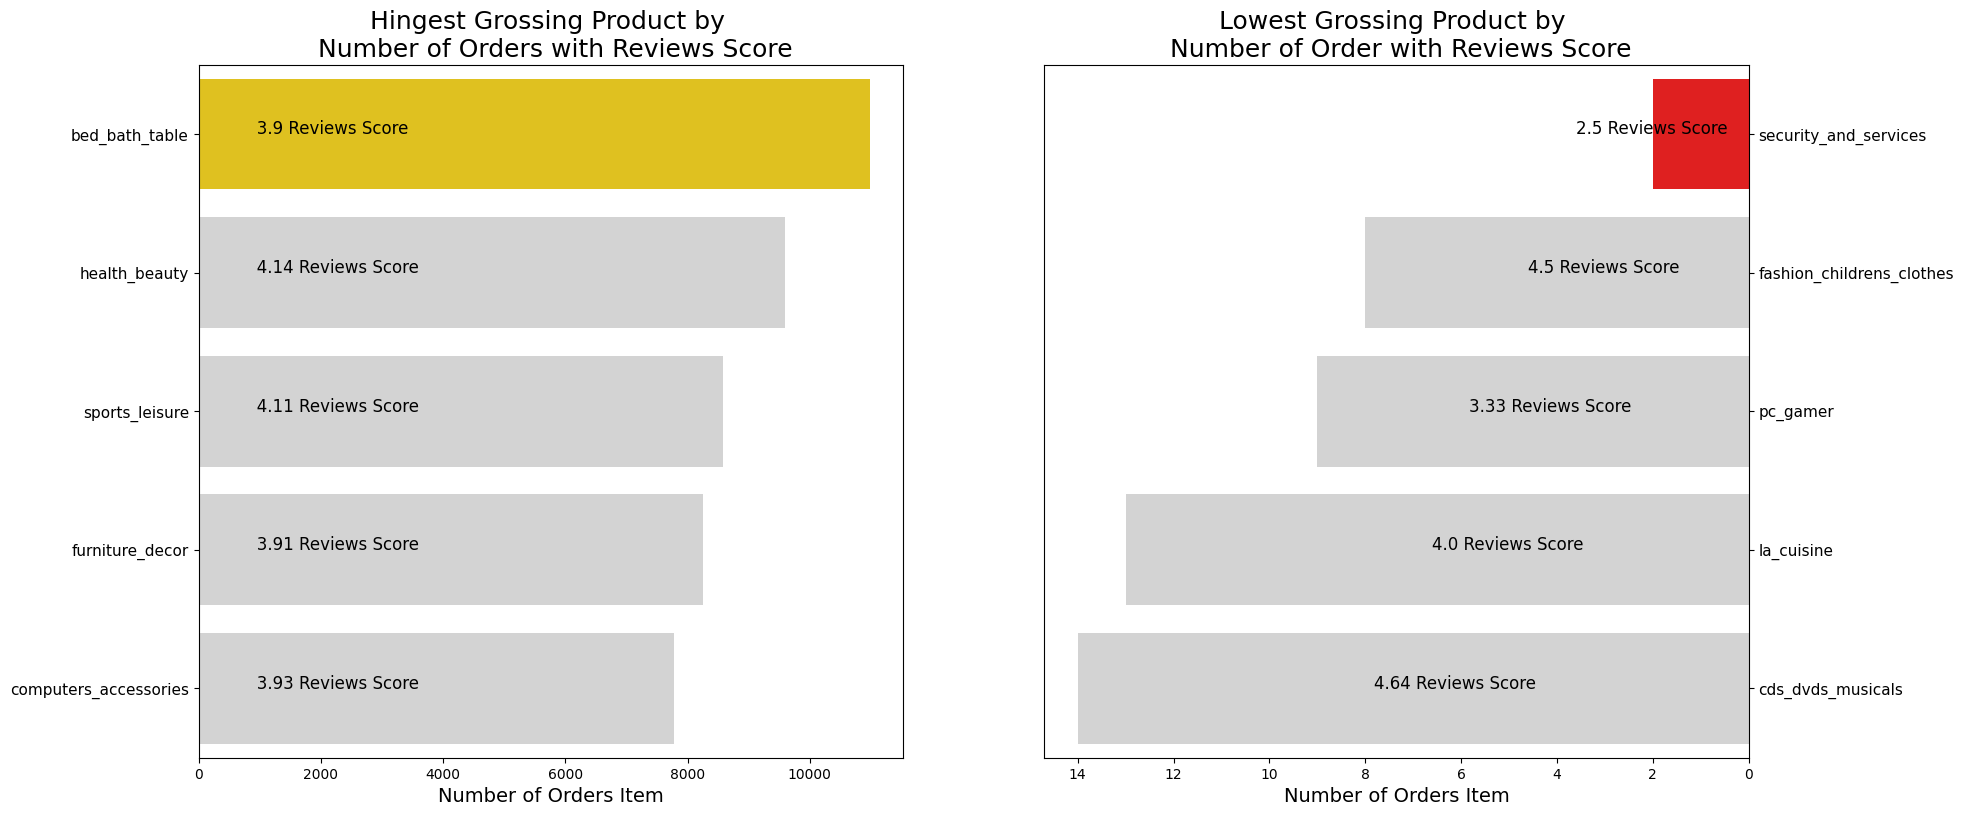

In [80]:
#Visualisasi Jawaban Nomor 1
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(20,9))
colors1 = ["#FFD700", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors2 = ["#FF0000", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

ax[0]=sns.barplot(x='total_order', y='product_category', data=grossing_rating.head(), palette=colors1, ax=ax[0])
for index, row in grossing_rating.head().iterrows():
   ax[0].text(row.name, row.name, (f'           {round(row.review_score, 2)} Reviews Score'), color='Black', fontsize=12)
ax[0].set_ylabel(None)
ax[0].set_xlabel('Number of Orders Item', fontsize=14)
ax[0].tick_params(axis='y', rotation=0)
ax[0].set_title('Hingest Grossing Product by \n Number of Orders with Reviews Score', fontsize=18)
ax[0].tick_params(axis='y', labelsize=11)

ax[1]=sns.barplot(x='total_order', y='product_category', data=grossing_rating.sort_values(by='total_order', ascending=True).head(), palette=colors2, ax=ax[1])
for index, row in grossing_rating.sort_values(by='total_order', ascending=True).head().reset_index().iterrows():
  ax[1].text(row.name, row.name, (f'{round(row.review_score, 2)} Reviews Score    '), ha='right', color='Black', fontsize=12)

ax[1].set_ylabel(None)
ax[1].set_xlabel('Number of Orders Item', fontsize=14)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', rotation=0)
ax[1].set_title('Lowest Grossing Product by \n Number of Order with Reviews Score', fontsize=18)
ax[1].tick_params(axis='y', labelsize=11)
plt.show()

In [81]:
#Top 5 and Low % berdasarkan average price
grossing_rating2 = final_rating_category.groupby(by='product_category_name_english').agg({
    'review_score' : 'mean',
    'Unique_Value' : 'nunique',
    'price' : 'mean',
}).sort_values(by='price', ascending=False).reset_index()
grossing_rating2.columns=['product_category', 'review_score', 'total_order', 'average_price']

grossing_rating2.head()

,product_category,review_score,total_order,average_price
0,computers,4.175000,200,1070.990650
1,small_appliances_home_oven_and_coffee,4.302632,76,624.285658
2,home_appliances_2,4.139831,236,478.596780
3,agro_industry_and_commerce,4.000000,212,342.124858
4,small_appliances,4.150074,673,280.343655


In [82]:
#Top 5 and Low % berdasarkan total price
grossing_rating3 = final_rating_category.groupby(by='product_category_name_english').agg({
    'review_score' : 'mean',
    'Unique_Value' : 'nunique',
    'price' : 'sum',
}).sort_values(by='price', ascending=False).reset_index()
grossing_rating3.columns=['product_category', 'review_score', 'total_order', 'total_revenue']

grossing_rating3.head()

,product_category,review_score,total_order,total_revenue
0,health_beauty,4.141218,9588,1247947.65
1,watches_gifts,4.018855,5940,1196495.83
2,bed_bath_table,3.899017,10982,1026192.38
3,sports_leisure,4.106631,8581,981241.38
4,computers_accessories,3.934336,7782,906893.17


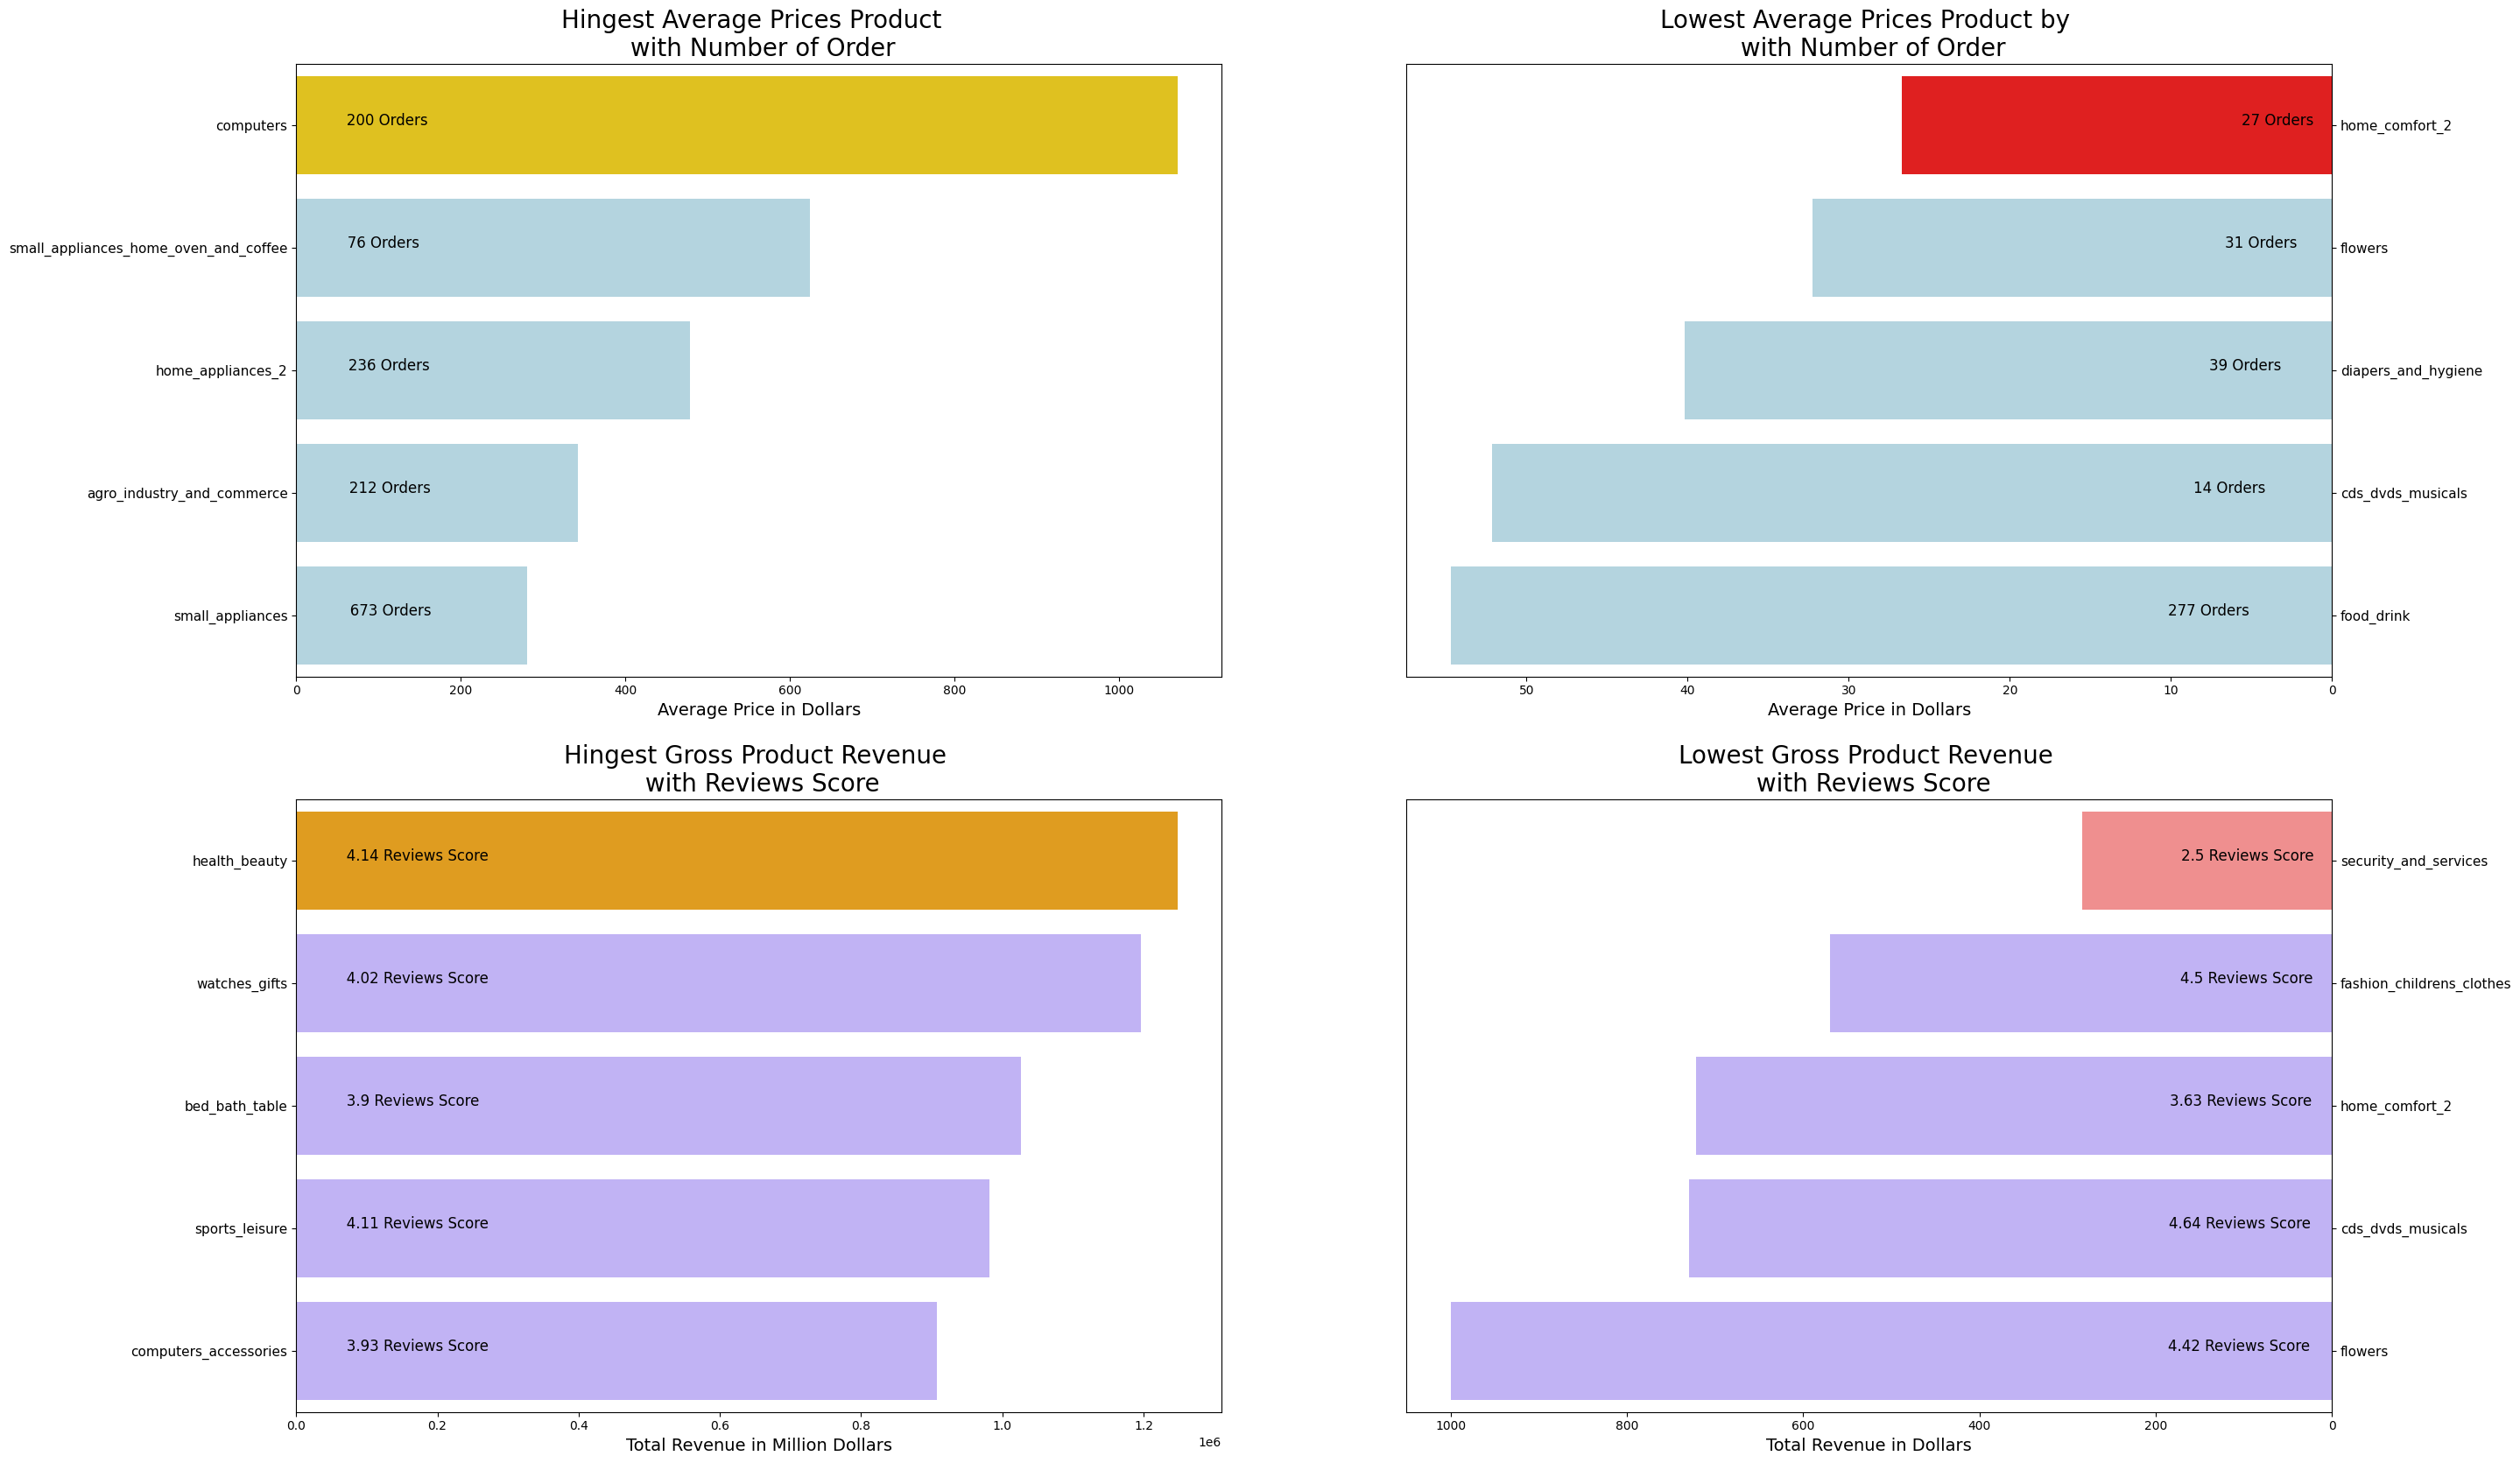

In [83]:
#Visualisasi Jawaban Nomor 2
fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(30,20))
colors1 = ["#FFD700", "#ADD8E6", "#ADD8E6", "#ADD8E6", "#ADD8E6"]
colors2 = ["#FF0000", "#ADD8E6", "#ADD8E6", "#ADD8E6", "#ADD8E6"]
colors3 = ['#FFA500', "#BBA8FF", "#BBA8FF", "#BBA8FF", "#BBA8FF"]
colors4 = ["#FF7F7F", "#BBA8FF", "#BBA8FF", "#BBA8FF", "#BBA8FF"]

#Tabel baris ke 1 kolom ke 1
ax[0,0]=sns.barplot(x='average_price', y='product_category', data=grossing_rating2.head(), palette=colors1, ax=ax[0,0])
for index, row in grossing_rating2.head().iterrows():
   ax[0,0].text(row.name, row.name, (f'           {round(row.total_order, 2)} Orders'), color='Black', fontsize=12)
ax[0,0].set_ylabel(None)
ax[0,0].set_xlabel('Average Price in Dollars', fontsize=14)
ax[0,0].tick_params(axis='y', rotation=0)
ax[0,0].set_title('Hingest Average Prices Product  \n with Number of Order', fontsize=20)
ax[0,0].tick_params(axis='y', labelsize=11)

#Tabel baris ke 1 kolom ke 2
ax[0,1]=sns.barplot(x='average_price', y='product_category', data=grossing_rating2.sort_values(by='average_price', ascending=True).head(), palette=colors2, ax=ax[0,1])
for index, row in grossing_rating2.sort_values(by='average_price', ascending=True).head().reset_index().iterrows():
  ax[0,1].text(row.name, row.name, (f'{round(row.total_order, 2)} Orders    '), ha='right', color='Black', fontsize=12)

ax[0,1].set_ylabel(None)
ax[0,1].set_xlabel(None)
ax[0,1].set_xlabel('Average Price in Dollars', fontsize=14)
ax[0,1].invert_xaxis()
ax[0,1].yaxis.set_label_position('right')
ax[0,1].yaxis.tick_right()
ax[0,1].tick_params(axis='y', rotation=0)
ax[0,1].set_title('Lowest Average Prices Product by \n with Number of Order', fontsize=20)
ax[0,1].tick_params(axis='y', labelsize=11)

#Tabel baris ke 2 kolom ke 1
ax[1,0]=sns.barplot(x='total_revenue', y='product_category', data=grossing_rating3.head(), palette=colors3, ax=ax[1,0])
for index, row in grossing_rating3.head().iterrows():
   ax[1,0].text(row.name, row.name, (f'           {round(row.review_score, 2)} Reviews Score'), color='Black', fontsize=12)
ax[1,0].set_ylabel(None)
ax[1,0].set_xlabel('Total Revenue in Million Dollars', fontsize=14)
ax[1,0].tick_params(axis='y', rotation=0)
ax[1,0].set_title('Hingest Gross Product Revenue \n with Reviews Score', fontsize=20)
ax[1,0].tick_params(axis='y', labelsize=11)

#Tabel baris ke 2 kolom ke 2
ax[1,1]=sns.barplot(x='total_revenue', y='product_category', data=grossing_rating3.sort_values(by='total_revenue', ascending=True).head(), palette=colors4, ax=ax[1,1])
for index, row in grossing_rating3.sort_values(by='total_revenue', ascending=True).head().reset_index().iterrows():
  ax[1,1].text(row.name, row.name, (f'{round(row.review_score, 2)} Reviews Score    '), ha='right', color='Black', fontsize=12)

ax[1,1].set_ylabel(None)
ax[1,1].set_xlabel(None)
ax[1,1].set_xlabel('Total Revenue in Dollars', fontsize=14)
ax[1,1].invert_xaxis()
ax[1,1].yaxis.set_label_position('right')
ax[1,1].yaxis.tick_right()
ax[1,1].tick_params(axis='y', rotation=0)
ax[1,1].set_title('Lowest Gross Product Revenue \n with Reviews Score', fontsize=20)
ax[1,1].tick_params(axis='y', labelsize=11)

plt.show()

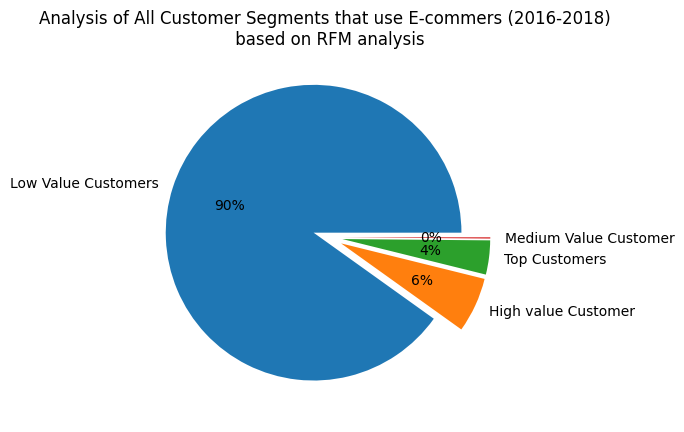

In [84]:
#Untuk mejawab pertanyaan analisis RFM
explode=(0.1, 0.1, 0.1, 0.1)

plt.pie(
		customer_rfm.Customer_segment.value_counts(),
		labels=customer_rfm.Customer_segment.value_counts().index,
		autopct='%.0f%%',
		explode=explode
		)
plt.title('Analysis of All Customer Segments that use E-commers (2016-2018) \n based on RFM analysis')
plt.show()

In [85]:
category_city.tail()

,customer_city,total_order,product_category_count,review_score,total_revenue
4088,magalhaes de almeida,1,1,4.0,270.90
4089,mae d'agua,1,1,4.0,39.89
4090,madalena,1,1,5.0,132.90
4091,macuco de minas,1,1,5.0,199.00
4092,zortea,1,1,3.0,69.90


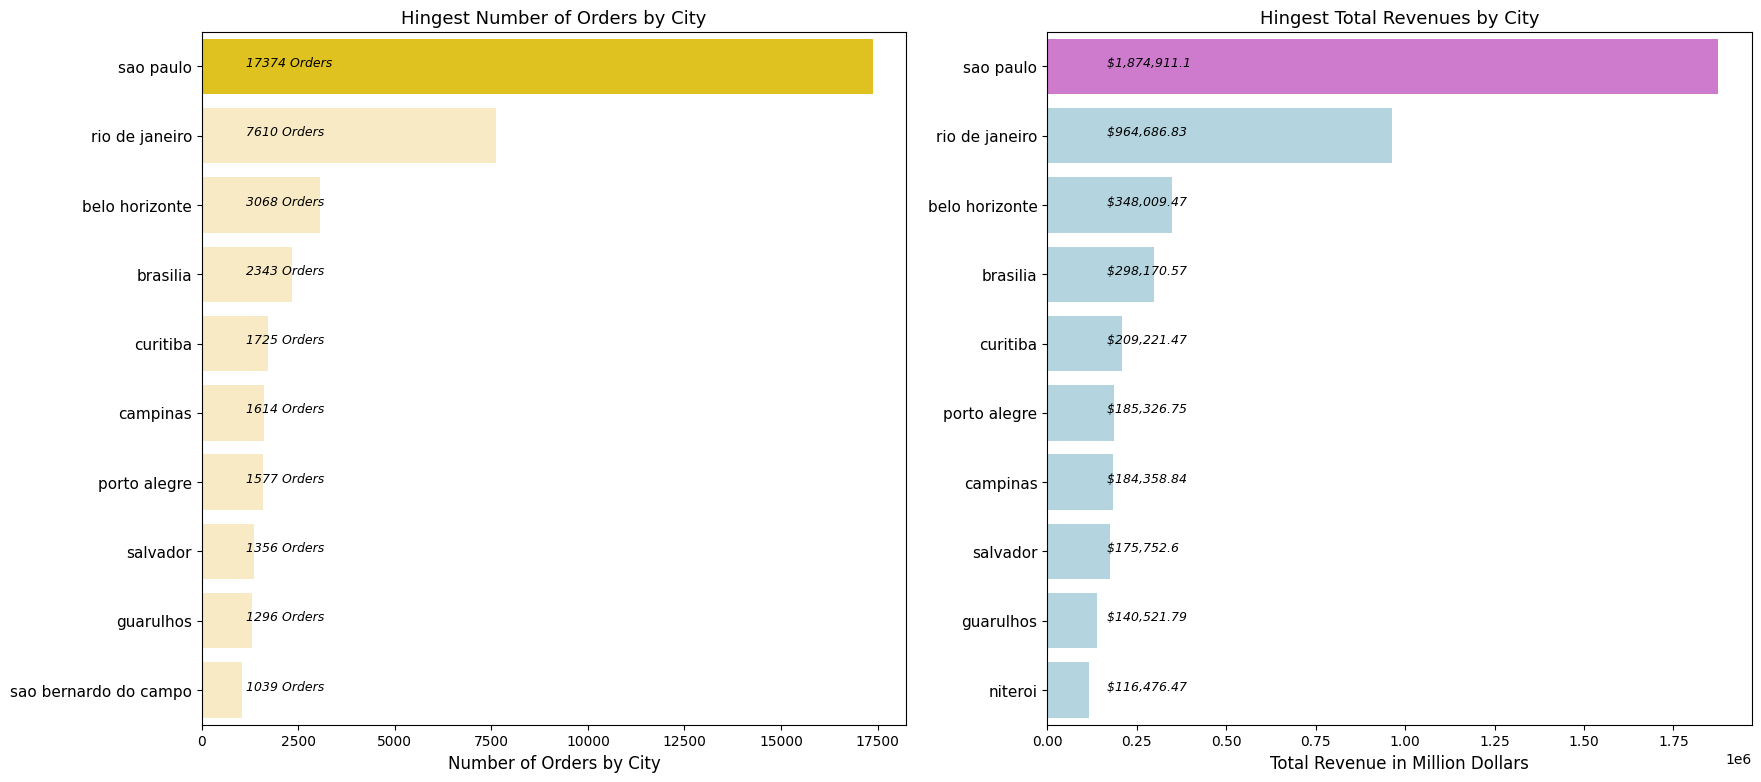

In [86]:
#Visualisasi Jawaban Nomor 4
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(20,9))
colors1 = ["#FFD700", "#FFEEBC", "#FFEEBC", "#FFEEBC", "#FFEEBC", "#FFEEBC", "#FFEEBC", "#FFEEBC", "#FFEEBC", "#FFEEBC"]
colors2 = ['#DC6DDC', "#ADD8E6", "#ADD8E6", "#ADD8E6", "#ADD8E6", "#ADD8E6", "#ADD8E6", "#ADD8E6", "#ADD8E6", "#ADD8E6"]

#Tabel baris ke 1 kolom ke 1
ax[0]=sns.barplot(x='total_order', y='customer_city', data=category_city.head(10), palette=colors1, ax=ax[0])
for index, row in category_city.head(10).iterrows():
   ax[0].text(row.name, row.name, (f'           {round(row.total_order, 2)} Orders'), color='Black', fontsize=9, fontstyle='oblique')
ax[0].set_ylabel(None)
ax[0].set_xlabel('Number of Orders by City', fontsize=12)
ax[0].tick_params(axis='y', rotation=0)
ax[0].set_title('Hingest Number of Orders by City', fontsize=13)
ax[0].tick_params(axis='y', labelsize=11)

#Tabel baris ke 1 kolom ke 2
ax[1]=sns.barplot(x='total_revenue', y='customer_city', data=category_city.sort_values(by='total_revenue', ascending=False).head(10), palette=colors2, ax=ax[1])
for index, row in category_city.sort_values(by='total_revenue', ascending=False).head(10).reset_index().iterrows():
   ax[1].text(row.name, row.name, ("               ${:,}".format(round(row.total_revenue, 2))), color='Black', fontsize=9, fontstyle='oblique')
ax[1].set_ylabel(None)
ax[1].set_xlabel('Total Revenue in Million Dollars', fontsize=12)
ax[1].tick_params(axis='y', rotation=0)
ax[1].set_title('Hingest Total Revenues by City', fontsize=13)
ax[1].tick_params(axis='y', labelsize=11)

plt.show()

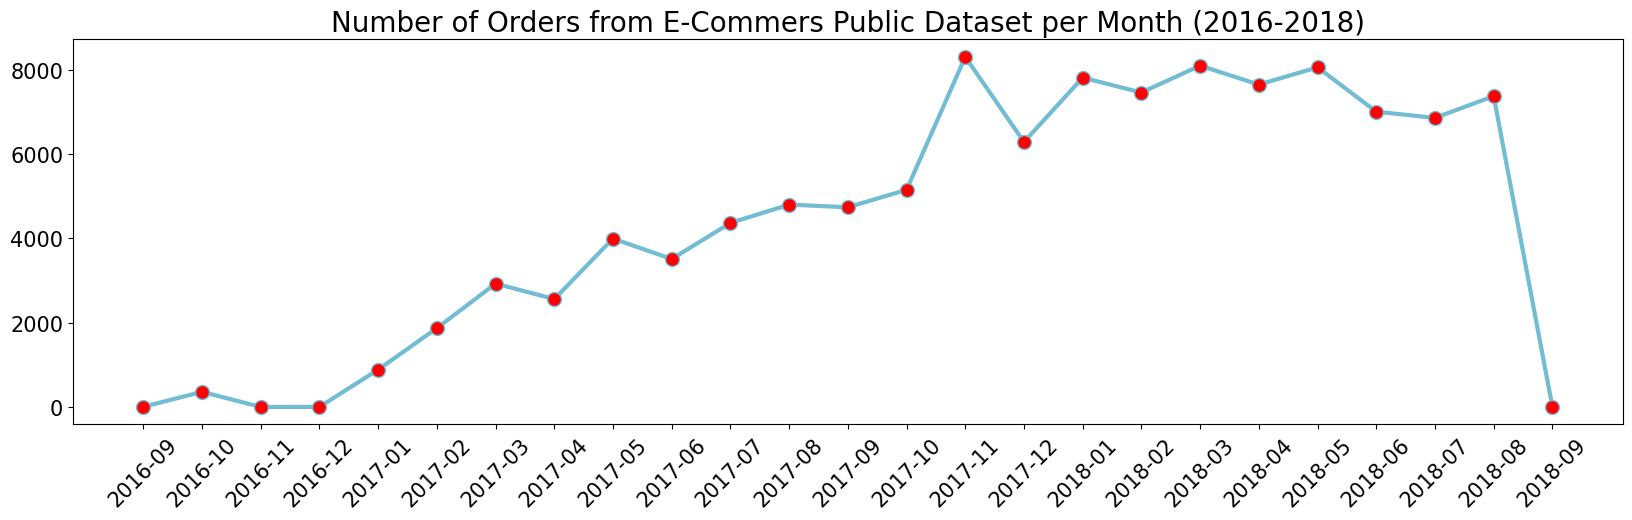

In [87]:
#Visualisasi penghasilan perbulan untuk pertanyaan ke 5

plt.figure(figsize=(20,5))
plt.plot(monthly_revenue['order_approved_at'], monthly_revenue['order_count'], marker='o', ms=10, mfc='r', linewidth=3, color='#72BCD4')
plt.title('Number of Orders from E-Commers Public Dataset per Month (2016-2018)', loc='center', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)
plt.show()

# **Mengunduh data yang diperlukan untuk Pembuatan Dashboard**

In [88]:
product_review_translate.to_csv("product_review_translate.csv", index=False)

In [89]:
final_customer_order.to_csv('final_customer_order.csv', index=False)

In [90]:
!pipreqs .

INFO: Successfully saved requirements file in ./requirements.txt
